In [1]:
%%html
<style>
table {float:left}
</style>

# Power Spectrum and Power Spectrum Density

* [1.3.2.c Interpreting a DFT plot](https://www.coursera.org/learn/dsp1/lecture/Mrwua?t=107)

> The square magnitude of the k-th DFT coefficient gives an indication of the energy associated to the frequency (2π/N)*k that composes a signal. The signal's energy at a given frequency is proportional to the magnitude of the DFT coefficient at that point.

> <img src="image/parseval_theorem.png" align="left" width=600/>

[How to scale FFT and PSD in Matlab](https://www.youtube.com/watch?v=D67ZgH8FEAI)

<img src="image/amplitude.png" align="left" width=800/>

<img src="image/PSD.png" align="left" width=800/>

<img src="image/fft_to_amplitude.png" align="left" width=600/> 

 <img src="image/fft_to_power.png" align="left" width=600/>

<img src="image/fft_to_psd.png" align="left" width=600/>

In [2]:
from typing import (
    Callable
)
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy.fft import (
    rfft, 
    rfftfreq
)
import torch

from IPython.display import (
    Audio, 
    display
)

# Constant

In [34]:
FREQUENCY: float = 256
SAMPLING_RATE: int = 1e4 
DURATION: float = 3

# Function

In [35]:
def f(x):
    return np.sin(FREQUENCY * 2 * np.pi * x)

In [36]:
def f_amplitude(x):
    return np.abs(f(x))

In [37]:
def generate_samples(sampling_rate: float, seconds: float, func: Callable):
    x = np.linspace(0, seconds, int(sampling_rate * seconds), endpoint=False)
    return x, func(x)

In [38]:
x, y = generate_samples(sampling_rate=SAMPLING_RATE, seconds=DURATION, func=f)

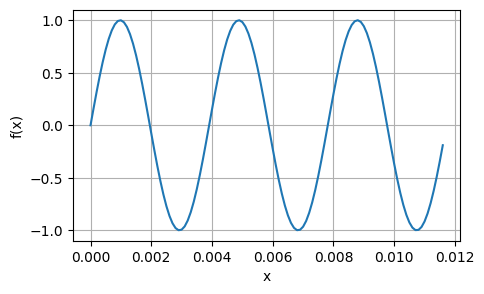

In [39]:
plt.figure(figsize=(5,3))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.plot(x[:int(len(x) / FREQUENCY)], y[:int(len(x) / FREQUENCY)])
plt.show()

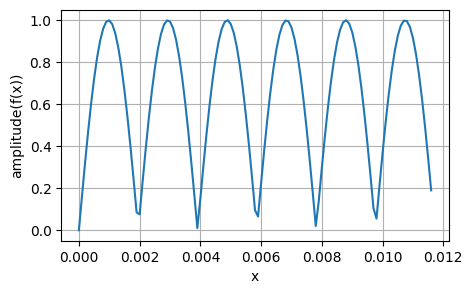

In [40]:
plt.figure(figsize=(5,3))
plt.xlabel('x')
plt.ylabel('amplitude(f(x))')
plt.grid()
plt.plot(x[:int(len(x) / FREQUENCY)], f_amplitude(x)[:int(len(x) / FREQUENCY)])
# plt.plot(x, f_amplitude(x))
plt.show()

# FFT

In [41]:
N = len(x)
assert N == int(SAMPLING_RATE * DURATION)

# Frequencies
xf = rfftfreq(
    n=N,             # window length
    d=(1/SAMPLING_RATE)    # delta(t) = sample spacing.
)

# Manitude
yf = np.abs(rfft(x=y, n=len(x))) / N

# Amplitude
a = 2 * yf

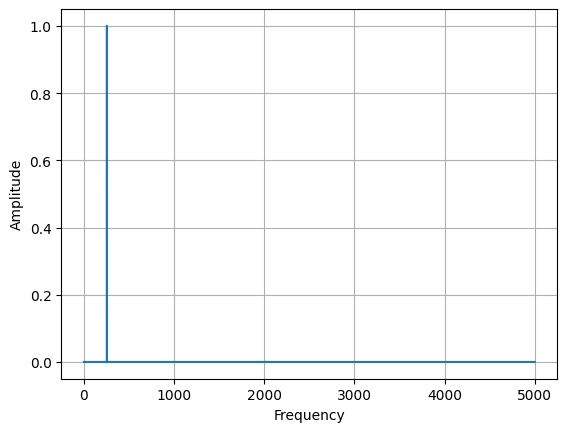

In [42]:
plt.plot(xf, a)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Power

$
P = A^2 / 2
$

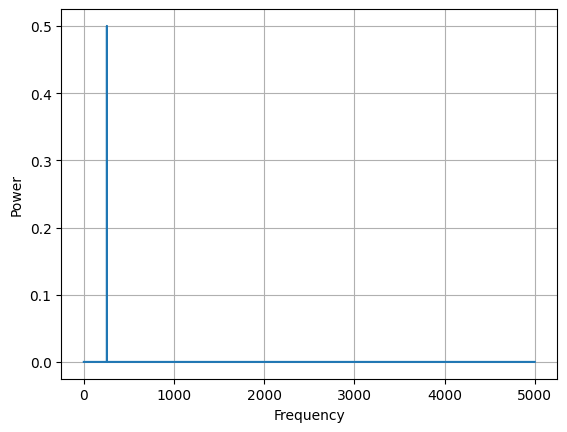

In [43]:
p = np.power(a, 2) / 2
plt.plot(xf, p)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.grid()
plt.show()

# Amplitude, Power, PSD

* [PSD calculation from FFT does not match with the value from scipy.signal.welch](https://dsp.stackexchange.com/questions/94571/psd-calculation-from-fft-does-not-match-with-the-value-from-scipy-signal-welch)

In [44]:
def plot(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(5,2))
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()

exepected amplitude 2.8284271247461903, actual amplitude 2.8310076172560237


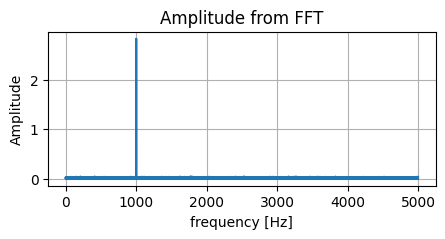

power is 4.007302064480815


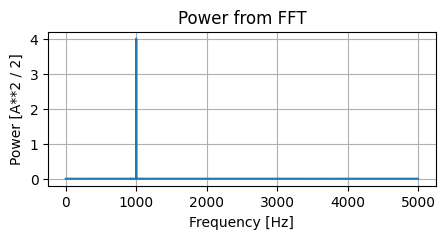

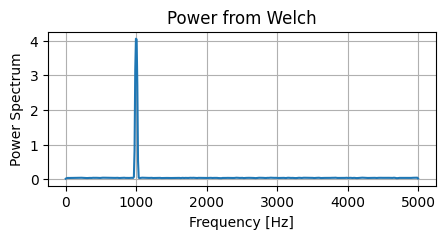

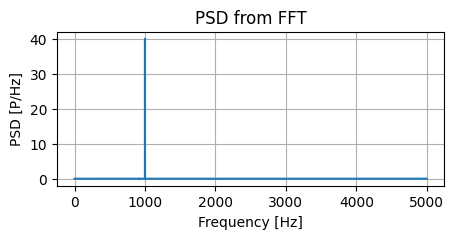

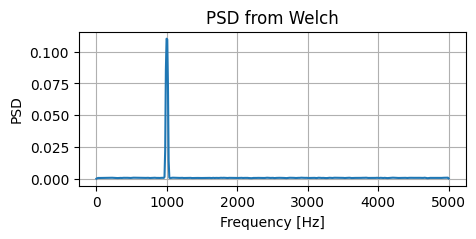

In [49]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
 
# --------------------------------------------------------------------------------
# Sampling (duration 10 secs)
# --------------------------------------------------------------------------------
FS = 1e4      # Sampling Rate
N = 1e5       # Total sample points
time = np.arange(N) / FS

# --------------------------------------------------------------------------------
# Target wave A * sin(2pi * F)
# --------------------------------------------------------------------------------
A = 2*np.sqrt(2)    # Amplitude
F = FREQUENCY       # Frequency
x = A * np.sin(2*np.pi * F * time)

# Noise
noise_power = 0.001 * FS / 2
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

# --------------------------------------------------------------------------------
# FFT
# --------------------------------------------------------------------------------
freqs = np.fft.rfftfreq(time.size, 1/FS)
idx = np.argsort(freqs)
yf = np.abs(np.fft.rfft(x))

amplitude = 2 * yf / N
print(f"exepected amplitude {A}, actual amplitude {amplitude[np.argmax(amplitude)]}")
plot(freqs[idx], amplitude[idx], xlabel='frequency [Hz]', ylabel='Amplitude', title="Amplitude from FFT")

# --------------------------------------------------------------------------------
# Power Spectrum P = A**2 / 2
# --------------------------------------------------------------------------------
power = amplitude ** 2 / 2
print(f"power is {power[np.argmax(power)]}")
plot(freqs[idx], power[idx], xlabel='Frequency [Hz]', ylabel='Power [A**2 / 2]', title="Power from FFT")

# --------------------------------------------------------------------------------
# Power Spectram from Welch
# --------------------------------------------------------------------------------
f, welch_P = signal.welch(x, FS, 'flattop', 1024, scaling='spectrum')
plot(f, welch_P, xlabel='Frequency [Hz]', ylabel='Power Spectrum', title="Power from Welch")

# --------------------------------------------------------------------------------
# PSD = P * (1/FS)
# --------------------------------------------------------------------------------
psd = power * (N/FS)
plot(freqs[idx], psd[idx], xlabel='Frequency [Hz]', ylabel='PSD [P/Hz]', title="PSD from FFT")

# --------------------------------------------------------------------------------
# PDF from Welch
# --------------------------------------------------------------------------------
f, welch_psd = signal.welch(x, FS, 'flattop', 1024, scaling='density')
plot(f, welch_psd, xlabel='Frequency [Hz]', ylabel='PSD', title="PSD from Welch")

(array([0.00050441, 0.00094367, 0.0009558 , 0.00101118, 0.00098324,
        0.00104308, 0.00102538, 0.00092905, 0.00102921, 0.00107632,
        0.00100682, 0.00100784, 0.00101269, 0.00101911, 0.00104388,
        0.00099416, 0.00090847, 0.00094424, 0.00099863, 0.00101157,
        0.00096167, 0.00095016, 0.00095934, 0.00112478, 0.00217689,
        0.04362987, 0.05614114, 0.00438763, 0.00113682, 0.00105395,
        0.00097483, 0.00098472, 0.00092912, 0.00097243, 0.00105843,
        0.00103988, 0.00106281, 0.00099148, 0.00094099, 0.00091928,
        0.00096264, 0.00103349, 0.00099105, 0.00100917, 0.00095983,
        0.00106009, 0.00109669, 0.00098085, 0.00093081, 0.00102813,
        0.00099271, 0.00098901, 0.00100652, 0.00098171, 0.00102974,
        0.00100482, 0.00090196, 0.00088796, 0.00095572, 0.00102698,
        0.001004  , 0.00100068, 0.00099293, 0.00098986, 0.00099572,
        0.00109156, 0.00107625, 0.00101113, 0.00092174, 0.00088984,
        0.00096719, 0.00099834, 0.00092894, 0.00

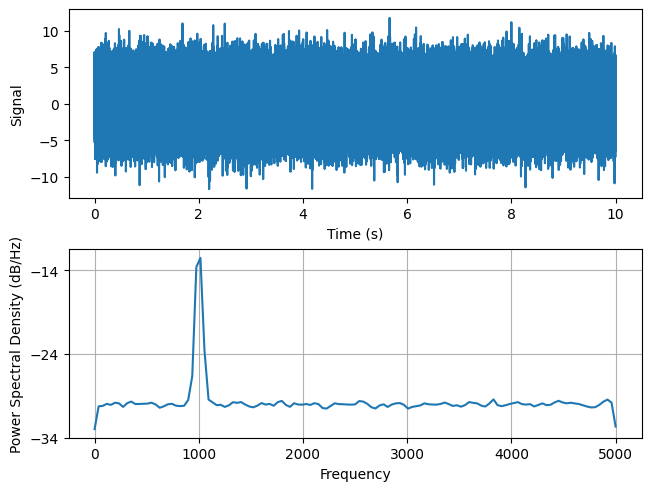

In [51]:
fig, (ax0, ax1) = plt.subplots(2, 1, layout='constrained')
ax0.plot(time, x)
ax0.set_xlabel('Time (s)')
ax0.set_ylabel('Signal')
ax1.psd(x, FREQUENCY, FS)